• As another example of using manifold learning for visualization, let's take a look at the MNIST handwritten digits set.

• This data is similar to the digits we saw in In-Depth: Decision Trees and Random Forests, but with many more pixels per image.

• It can be downloaded from http://mldata.org/ with the Scikit-Learn utility:

• We begin with the standard imports:

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
from sklearn.datasets import fetch_mldata
DATA_PATH = '/home/rajesh/git/python_excercise_programiz/python/12_scikit_learn'
mnist = fetch_mldata('MNIST original', data_home=DATA_PATH)
mnist.data.shape

/home/rajesh/my_project/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/rajesh/my_project/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)

• This consists of 70,000 images, each with 784 pixels (i.e. the images are 28×28).

• As before, we can take a look at the first few images:

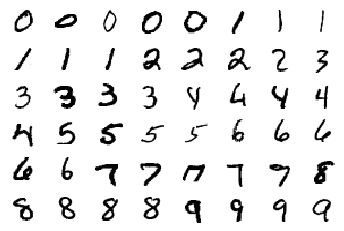

In [11]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i , axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap = 'gray_r')

• This gives us an idea of the variety of handwriting styles in the dataset.

• Let's compute a manifold learning projection across the data.

• For speed here, we'll only use 1/30 of the data, which is about ~2000 points (because of the relatively poor scaling of manifold learning, I find that a few thousand samples is a good number to start with for relatively quick exploration before moving to a full calculation):

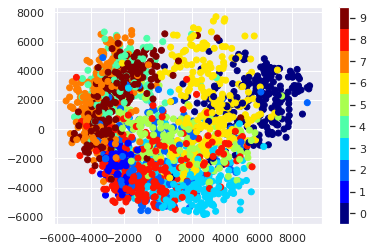

In [16]:
from sklearn.manifold import Isomap

# Use only 1/30 of the data; full dataset takes a long time
data = mnist.data[::30]
target = mnist.target[::30]

model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

• The resulting scatter plot shows some of the relationships between the data points, but is a bit crowded.

• We can gain more insight by looking at just a single number at a time:

• To get a better idea of what the projection tells us, let's define a function that will output image thumbnails at the locations of the projections:

In [21]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

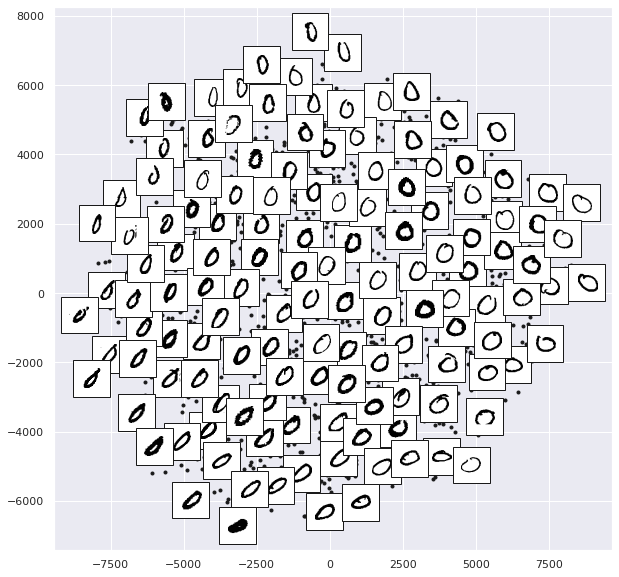

In [25]:
# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target == 0][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')

• The result gives you an idea of the variety of forms that the number "1" can take within the dataset.

• The data lies along a broad curve in the projected space, which appears to trace the orientation of the digit. 

• As you move up the plot, you find ones that have hats and/or bases, though these are very sparse within the dataset.

• The projection lets us identify outliers that have data issues: for example, pieces of the neighboring digits that snuck into the extracted images.

• Now, this in itself may not be useful for the task of classifying digits, but it does help us get an understanding of the data, and may give us ideas about how to move forward, such as how we might want to preprocess the data before building a classification pipeline.